In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [23]:
abalone = pd.read_csv('./abalone.csv')


In [24]:
abalone.head(5)


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [25]:
abalone.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [26]:
abalone.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [27]:
abalone['Sex']=pd.get_dummies(abalone, columns=['Sex'])
abalone

ValueError: Columns must be same length as key

In [7]:
X = abalone.drop(columns= "Rings", axis = 1)
y = abalone.iloc[:,8:]

In [8]:
X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [9]:
y

,Rings
0,15
1,7
2,9
3,10
4,7
...,...
4172,11
4173,10
4174,9
4175,10


In [10]:
#Splitting Data
#70% for train, 20% test, 10% val
x_train_validate, x_test, y_train_validate, y_test = train_test_split(X,y, test_size=0.2,random_state=33)
x_train, x_val,y_train,y_val = train_test_split(x_train_validate,y_train_validate,test_size=(1/8),random_state=33)


In [11]:
#data standardisation 

# to have standard range for all the feature(mean = 0 and SD= 1)
# of we dont do standardisatioin, if a feature has a variance that is much larger than other feature
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train)
x_train_scaler = scaler.transform(x_train)


In [17]:
#Feed forward neural network 
#we use a neural network to learn the relationship between the target and the feature
from sklearn.neural_network import MLPRegressor

mlp_regressor = MLPRegressor(verbose=True).fit(x_train_scaler,y_train)

/Users/jigmelhaden/miniforge3/envs/Sem3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 55.28018718
Iteration 2, loss = 48.49018281
Iteration 3, loss = 42.42923447
Iteration 4, loss = 36.82563194
Iteration 5, loss = 31.64306831
Iteration 6, loss = 27.01874585
Iteration 7, loss = 23.20704895
Iteration 8, loss = 20.33481064
Iteration 9, loss = 18.38354043
Iteration 10, loss = 17.11073269
Iteration 11, loss = 16.13923221
Iteration 12, loss = 15.29047273
Iteration 13, loss = 14.41741659
Iteration 14, loss = 13.50448909
Iteration 15, loss = 12.55229206
Iteration 16, loss = 11.56924552
Iteration 17, loss = 10.57883801
Iteration 18, loss = 9.60317022
Iteration 19, loss = 8.65757174
Iteration 20, loss = 7.76259203
Iteration 21, loss = 6.92542935
Iteration 22, loss = 6.16808862
Iteration 23, loss = 5.50992333
Iteration 24, loss = 4.95521657
Iteration 25, loss = 4.50065022
Iteration 26, loss = 4.13564326
Iteration 27, loss = 3.84883197
Iteration 28, loss = 3.62878282
Iteration 29, loss = 3.45817250
Iteration 30, loss = 3.33644561
Iteration 31, loss = 3.23234796


/Users/jigmelhaden/miniforge3/envs/Sem3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [18]:
mlp_regressor.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': True,
 'warm_start': False}

In [19]:
print("Training score of MLP:", mlp_regressor.score(x_train_scaler,y_train))

# also standardise test data
x_val_scaled = scaler.transform(x_val)
print("Validation score of MLP:", mlp_regressor.score(x_val_scaled, y_val))

# also standardise test data
x_test_scaled = scaler.transform(x_test)
print("accuracy on unseen  of MLP:", mlp_regressor.score(x_test_scaled, y_test))

Training score of MLP: 0.5945820797592261
Validation score of MLP: 0.5075222168953791
accuracy on unseen  of MLP: 0.5580206719834271


In [20]:
from sklearn.metrics import mean_squared_error
# Predict on the training data
y_train_pred = mlp_regressor.predict(x_train_scaler)

# Predict on the test data
y_test_pred = mlp_regressor.predict(x_test_scaled)


In [21]:
mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)


In [22]:
print("Training MSE of MLP:", mse)
print("Test MSE of MLP:", test_mse)


Training MSE of MLP: 4.144581127165962
Test MSE of MLP: 5.154472864182014


In [31]:
import numpy as np
covariance_matrix = np.cov(x_train_scaler.T)
covariance_matrix

array([[ 1.00034223, -0.04636339, -0.05044793, -0.04803442, -0.03515527,
        -0.01532917, -0.04917071, -0.04366378],
       [-0.04636339,  1.00034223,  0.98796197,  0.8068839 ,  0.92689769,
         0.89891732,  0.9038784 ,  0.8958424 ],
       [-0.05044793,  0.98796197,  1.00034223,  0.81171166,  0.92657357,
         0.89399832,  0.89943199,  0.90270037],
       [-0.04803442,  0.8068839 ,  0.81171166,  1.00034223,  0.79652525,
         0.75252625,  0.77388217,  0.79115401],
       [-0.03515527,  0.92689769,  0.92657357,  0.79652525,  1.00034223,
         0.96824937,  0.96443879,  0.95411169],
       [-0.01532917,  0.89891732,  0.89399832,  0.75252625,  0.96824937,
         1.00034223,  0.92777475,  0.87898874],
       [-0.04917071,  0.9038784 ,  0.89943199,  0.77388217,  0.96443879,
         0.92777475,  1.00034223,  0.90209386],
       [-0.04366378,  0.8958424 ,  0.90270037,  0.79115401,  0.95411169,
         0.87898874,  0.90209386,  1.00034223]])

In [32]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print('eigenvalues:\n',eigenvalues,'\n\neigenvectors:\n',eigenvectors)

eigenvalues:
 [6.31650935 0.9993403  0.31095222 0.16747684 0.12024776 0.06935446
 0.01196089 0.00689603] 

eigenvectors:
 [[-2.04249856e-02  9.99040389e-01 -2.52549567e-02 -1.34178327e-02
  -1.28465387e-02 -2.26026573e-02 -2.61611182e-03 -7.16208469e-04]
 [ 3.84765912e-01  2.07360915e-03  2.75737927e-03 -5.89714128e-01
   8.87505942e-02 -3.96436097e-02  7.02440353e-01 -3.61912191e-02]
 [ 3.84867901e-01 -2.27840417e-03 -1.82899553e-02 -5.91510683e-01
   1.24026651e-02 -2.97494949e-03 -7.07576329e-01  2.87255901e-02]
 [ 3.41701625e-01 -1.02326863e-02 -8.97850436e-01  2.44605324e-01
   1.28809219e-01  2.28426719e-02  6.88866777e-03  2.65800631e-03]
 [ 3.91828591e-01  1.77220410e-02  2.10119242e-01  2.50244424e-01
  -4.75347812e-02  1.04231513e-01 -3.73948641e-02 -8.51388147e-01]
 [ 3.78904652e-01  3.82214763e-02  3.01624473e-01  2.62661409e-01
   4.94397635e-01  5.61411778e-01 -1.57175995e-04  3.67953549e-01]
 [ 3.81988029e-01  1.55900318e-03  2.28325702e-01  2.88229438e-01
   1.70368492e

[0.789, 0.125, 0.039, 0.021, 0.015, 0.009, 0.001, 0.001]


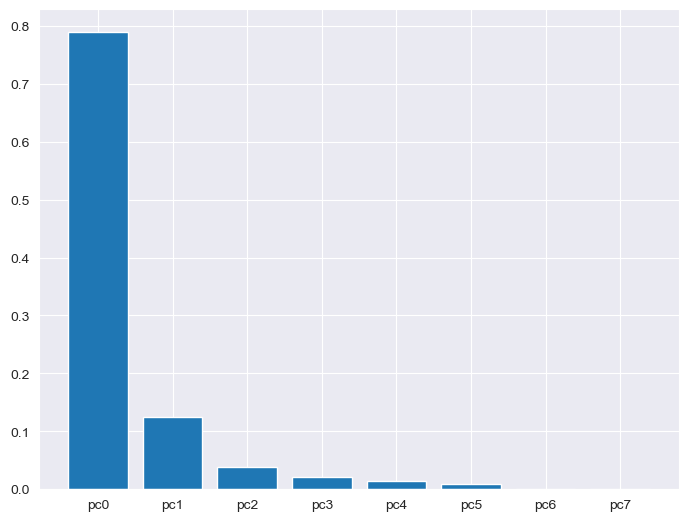

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

explained_variance = [round((i/np.sum(eigenvalues)), 3) for i in sorted(eigenvalues, reverse=True)]
print(explained_variance)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axis_labels = ['pc' + str(i) for i in np.arange(8)]
ax.bar(x_axis_labels,explained_variance)
plt.show()

In [13]:
X.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object')